In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Step 1: Reading and Understanding the Data


In [2]:
cars = pd.read_csv('C:/Users/subeh/Ai course/cars_price.csv')
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
cars.shape


(205, 26)

Step 2 : Data Cleaning and Preparation

In [4]:
#Splitting company name from CarName column
CompanyName = cars['CarName'].apply(lambda x : x.split(' ')[0])
cars.insert(3,"CompanyName",CompanyName)
cars.drop(['CarName'],axis=1,inplace=True)
cars.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


The lambda function takes an input x, which represents each element of the Series.
It then applies the split method to the element, splitting it into a list of substrings using the space (' ') as the separator.
The [0] at the end selects the first element (index 0) of the resulting list, which is the company name in this case.

The line cars.insert(3, "CompanyName", CompanyName) inserts the "CompanyName" Series into the DataFrame "cars" at the 3rd
position (index 3) as a new column, shifting other columns to the right.

The original "CarName" column still exists in the DataFrame.
to remove it, you can use the .drop method as shown in your previous code: cars.drop(['CarName'], axis=1, inplace=True).

When axis=1, it means that you are specifying a column-wise operation.The drop method will remove the specified columns
If axis=0, it would be a row-wise operation, and the drop method would remove the specified rows from the DataFrame.

In [5]:
cars.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [6]:
def replace_name(a,b):
    cars.CompanyName.replace(a,b,inplace=True)

replace_name('maxda','mazda')
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')
replace_name('vw','volkswagen')

cars.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [7]:
cars.loc[cars.duplicated()] #check if there is a duplicated rows

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


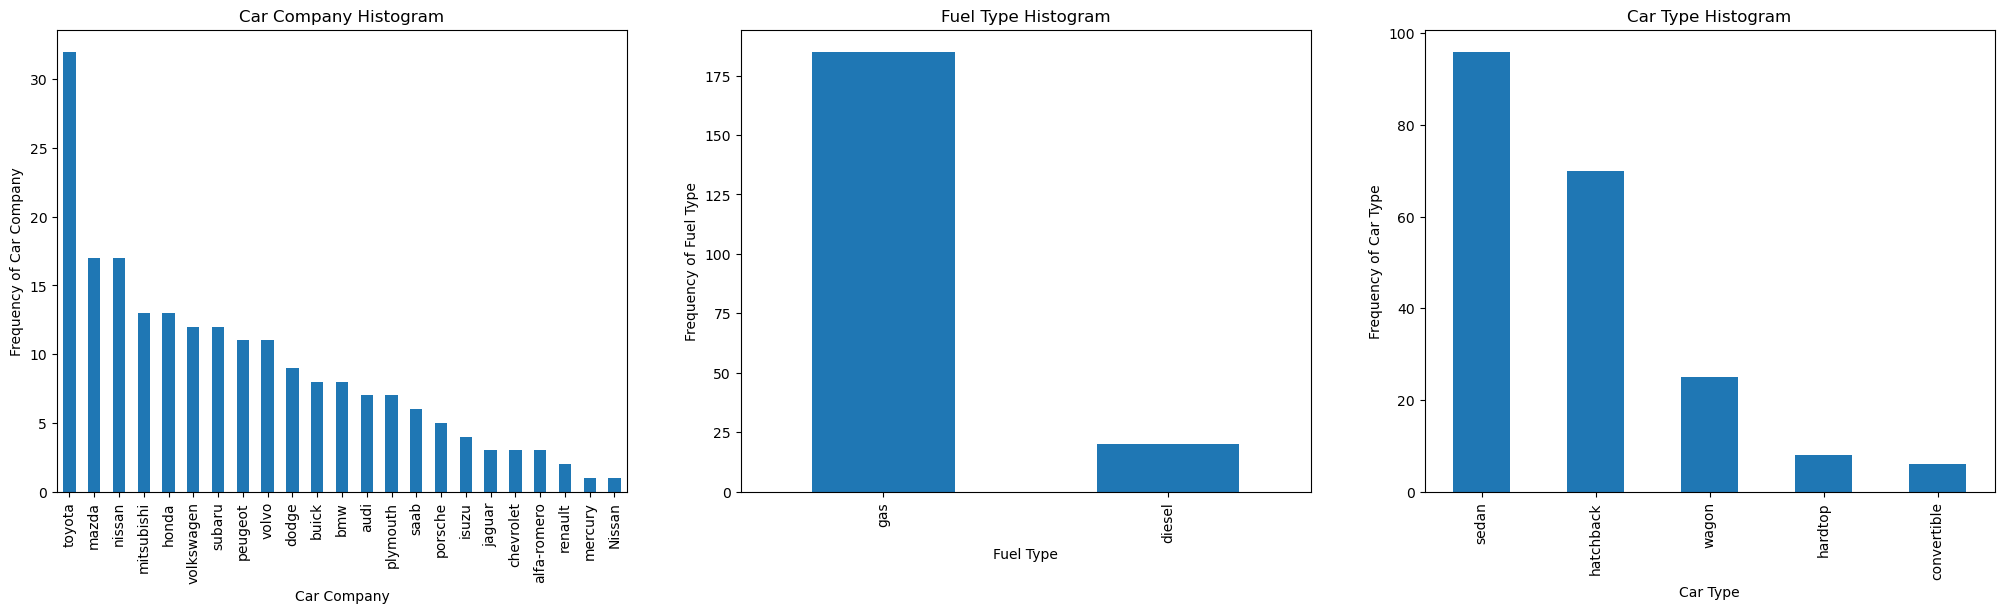

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(25, 6))

# Car Company Histogram
plt.subplot(1, 3, 1)
company_counts = cars['CompanyName'].value_counts()
plt1 = company_counts.plot(kind='bar')
plt.title('Car Company Histogram')
plt1.set(xlabel='Car Company', ylabel='Frequency of Car Company')

# Fuel Type Histogram
plt.subplot(1, 3, 2)
fueltype_counts = cars['fueltype'].value_counts()
plt1 = fueltype_counts.plot(kind='bar')
plt.title('Fuel Type Histogram')
plt1.set(xlabel='Fuel Type', ylabel='Frequency of Fuel Type')

# Car Type Histogram
plt.subplot(1, 3, 3)
carbody_counts = cars['carbody'].value_counts()
plt1 = carbody_counts.plot(kind='bar')
plt.title('Car Type Histogram')
plt1.set(xlabel='Car Type', ylabel='Frequency of Car Type')

plt.show()


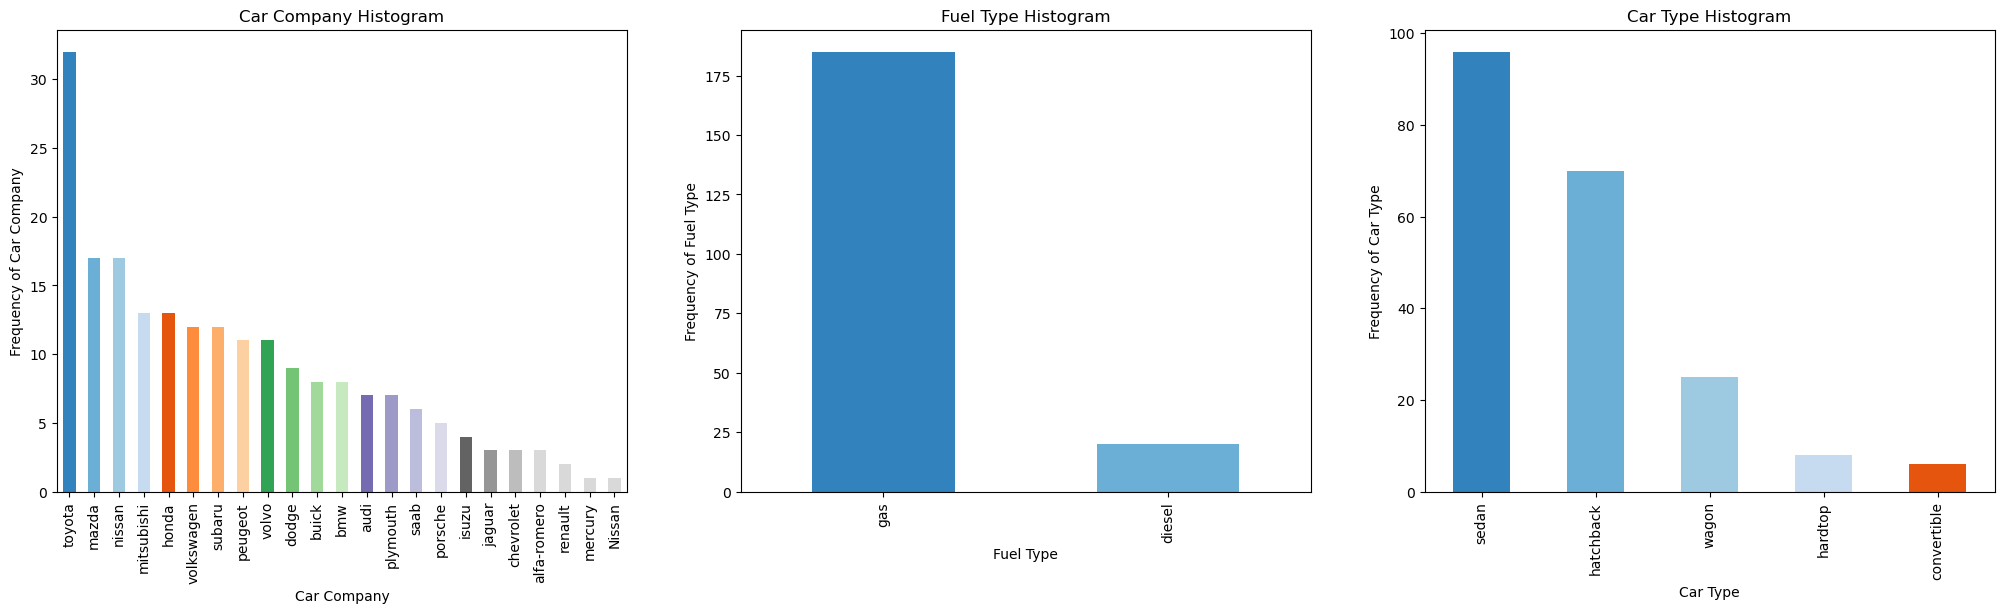

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(25, 6))

# Car Company Histogram
plt.subplot(1, 3, 1)
company_counts = cars['CompanyName'].value_counts()
colors = plt.cm.tab20c(range(len(company_counts)))
plt1 = company_counts.plot(kind='bar', color=colors)
plt.title('Car Company Histogram')
plt1.set(xlabel='Car Company', ylabel='Frequency of Car Company')

# Fuel Type Histogram
plt.subplot(1, 3, 2)
fueltype_counts = cars['fueltype'].value_counts()
colors = plt.cm.tab20c(range(len(fueltype_counts)))
plt1 = fueltype_counts.plot(kind='bar', color=colors)
plt.title('Fuel Type Histogram')
plt1.set(xlabel='Fuel Type', ylabel='Frequency of Fuel Type')

# Car Type Histogram
plt.subplot(1, 3, 3)
carbody_counts = cars['carbody'].value_counts()
colors = plt.cm.tab20c(range(len(carbody_counts)))
plt1 = carbody_counts.plot(kind='bar', color=colors)
plt.title('Car Type Histogram')
plt1.set(xlabel='Car Type', ylabel='Frequency of Car Type')

plt.show()


Toyota seemed to be favored car company.
Number of gas fueled cars are more than diesel.
sedan is the top car type prefered.

[Text(0.5, 0, 'symboling'), Text(0, 0.5, 'count')]

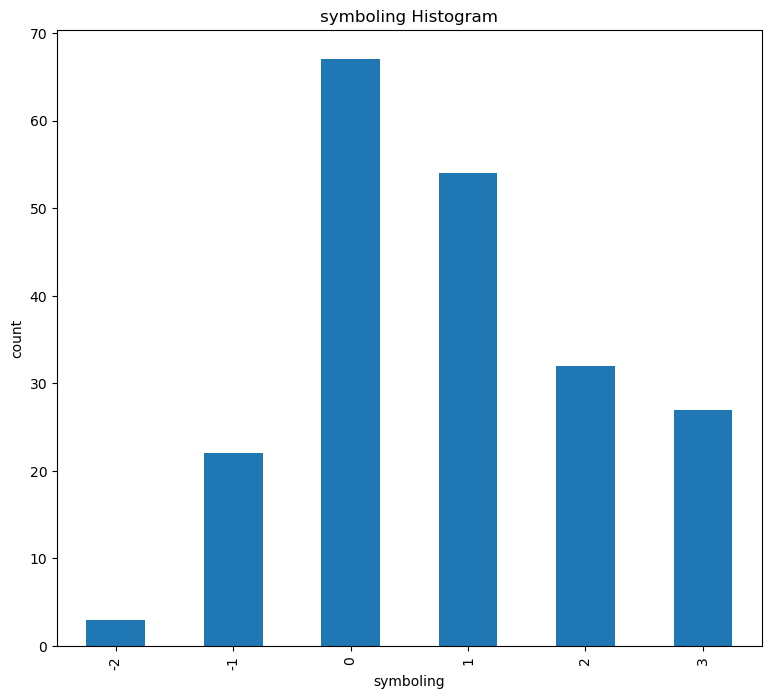

In [10]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Symboling Histogram')
symboling_counts = cars['symboling'].value_counts().sort_index()
plt1 = symboling_counts.plot(kind='bar')
plt.title('symboling Histogram')
plt1.set(xlabel='symboling', ylabel='count')


It seems that the symboling with 0 and 1 values have high number of rows (They are most sold.)


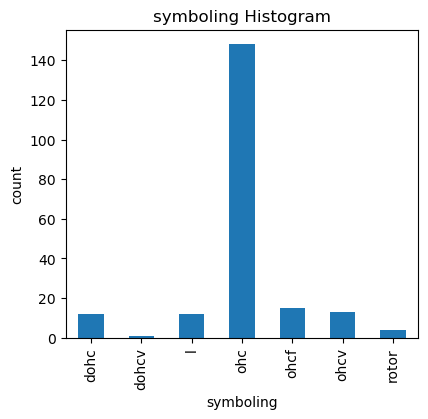

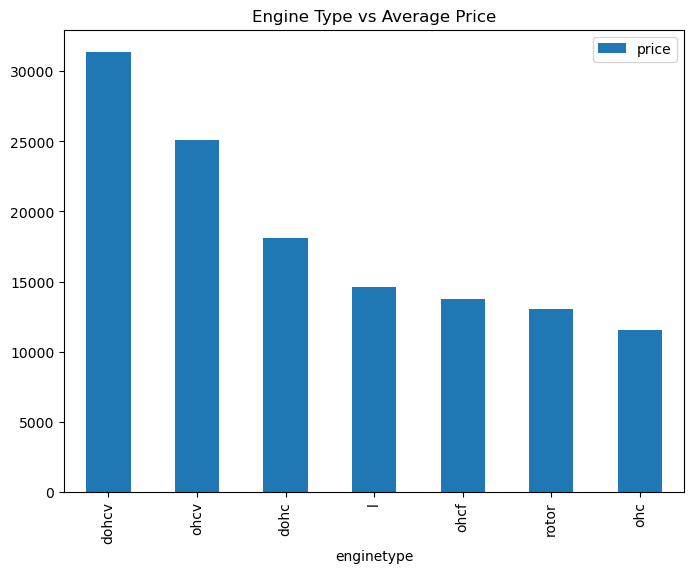

In [11]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.title('Engine Type Histogram')
enginetype = cars['enginetype'].value_counts().sort_index()
plt1 = enginetype.plot(kind='bar')
plt.title('symboling Histogram')
plt1.set(xlabel='symboling', ylabel='count')


df = pd.DataFrame(cars.groupby(['enginetype'])['price'].mean().sort_values(ascending = False))
df.plot.bar(figsize=(8,6))
plt.title('Engine Type vs Average Price')
plt.show()

ohc Engine type seems to be most favored type. 
dohcv has only one row and it is the highest price

<Figure size 2500x600 with 0 Axes>

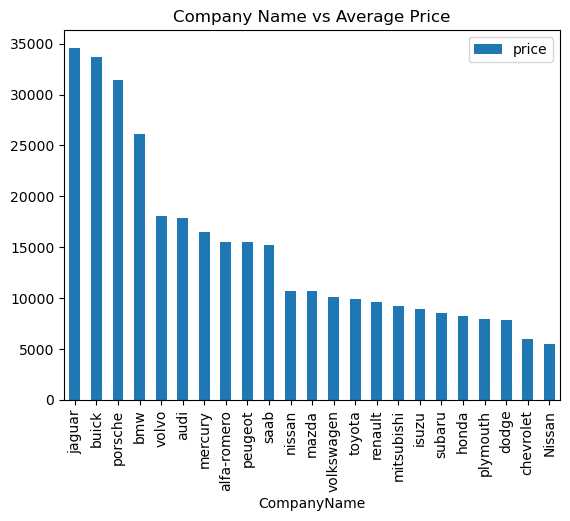

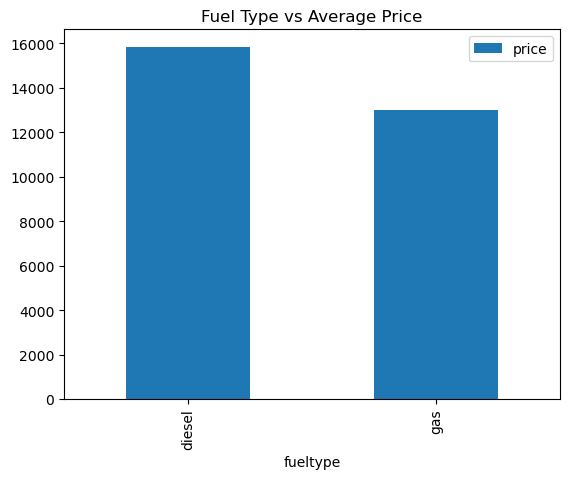

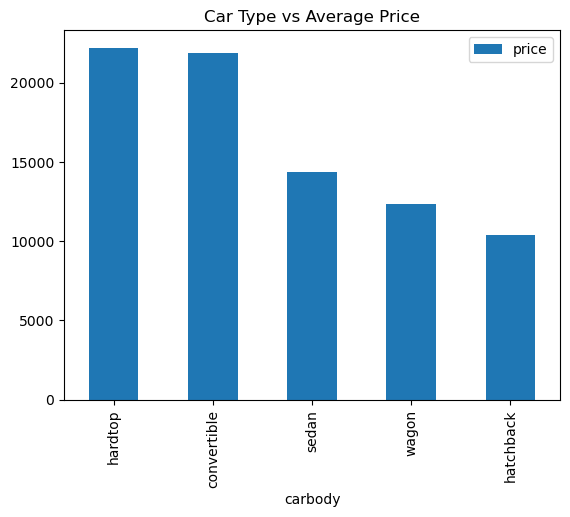

In [12]:
plt.figure(figsize=(25, 6))

df = pd.DataFrame(cars.groupby(['CompanyName'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Company Name vs Average Price')
plt.show()

df = pd.DataFrame(cars.groupby(['fueltype'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Fuel Type vs Average Price')
plt.show()

df = pd.DataFrame(cars.groupby(['carbody'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Car Type vs Average Price')
plt.show()

1-Jaguar and Buick seem to have highest average price.
2-diesel has higher average price than gas.
3-hardtop and convertible have higher average price.

[Text(0.5, 0, 'symboling'), Text(0, 0.5, 'count')]

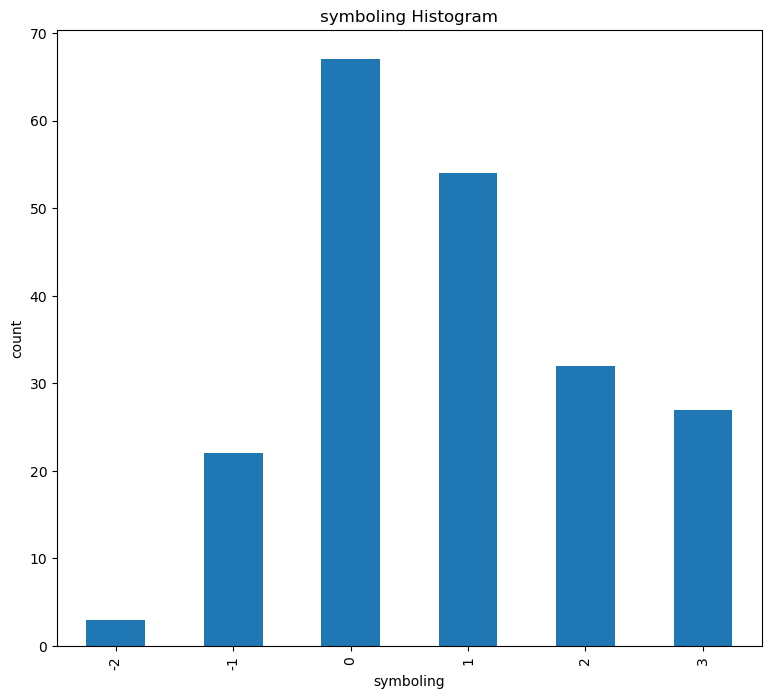

In [13]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Symboling Histogram')
symboling_counts = cars['symboling'].value_counts().sort_index()
plt1 = symboling_counts.plot(kind='bar')
plt.title('symboling Histogram')
plt1.set(xlabel='symboling', ylabel='count')

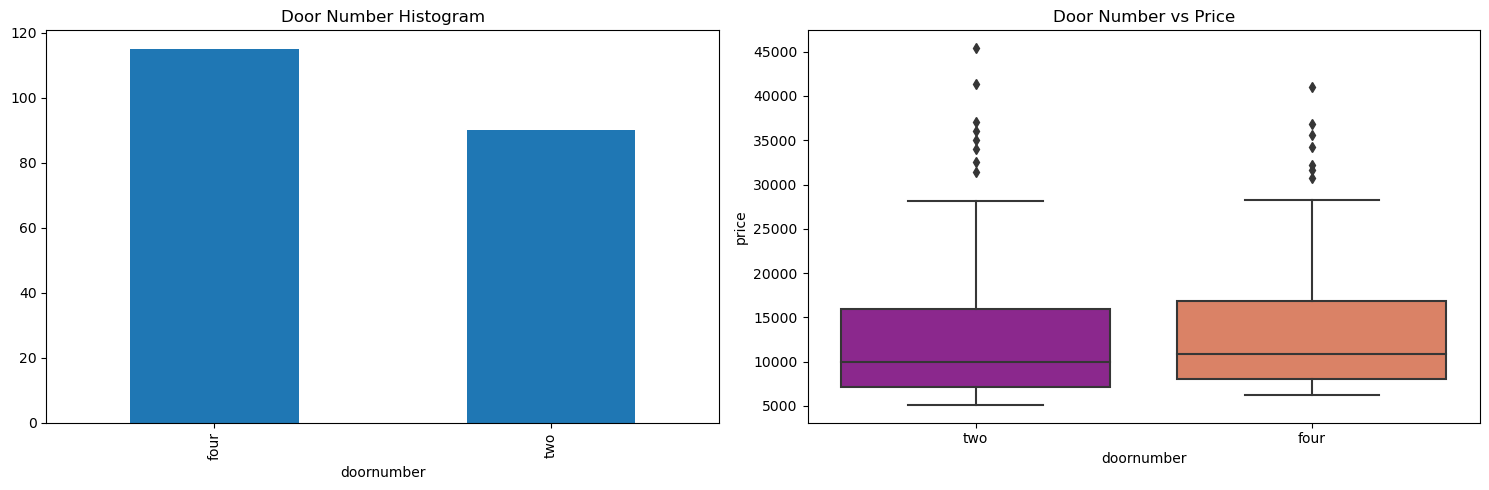

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 5))

# First subplot: Door Number Histogram with count numbers
plt.subplot(1, 2, 1)
plt.title('Door Number Histogram')
doornumber_counts = cars['doornumber'].value_counts()
plt1 = doornumber_counts.plot(kind='bar')



# Second subplot: Door Number vs Price
plt.subplot(1, 2, 2)
plt.title('Door Number vs Price')
sns.boxplot(x=cars.doornumber, y=cars.price, palette="plasma")

plt.tight_layout()
plt.show()


doors number variable is not affacting the price much

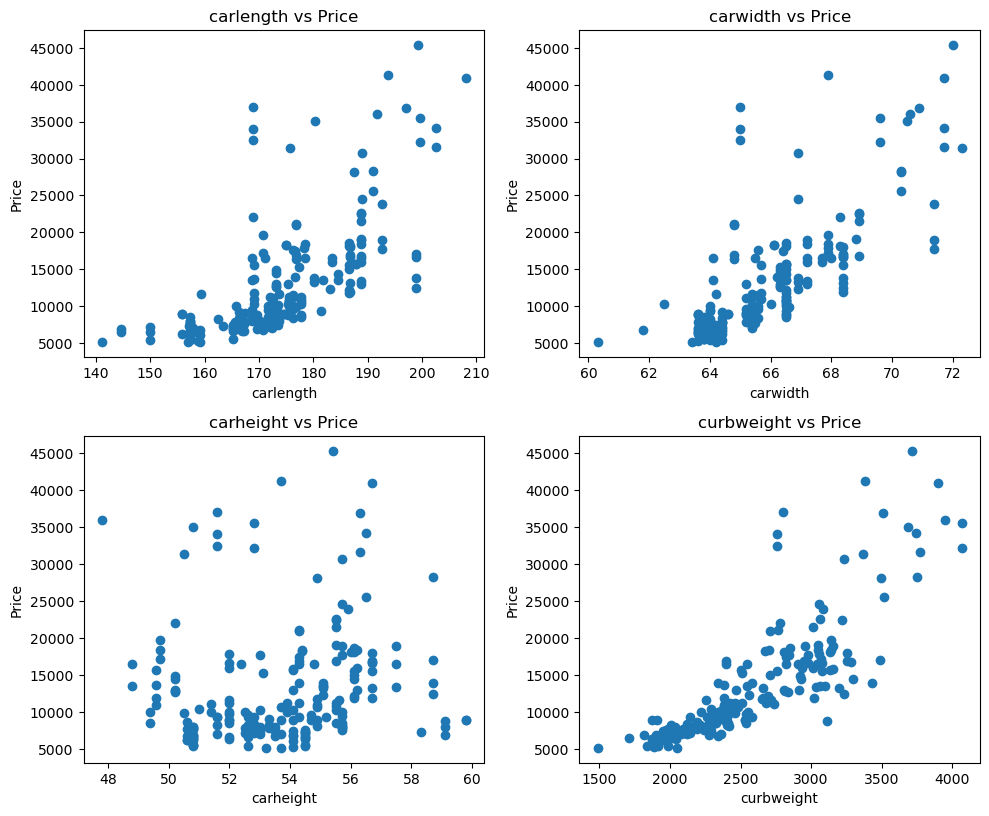

In [15]:
def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(cars[x],cars['price'])
    plt.title(x+' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)

plt.figure(figsize=(10,20))

scatter('carlength', 1)
scatter('carwidth', 2)
scatter('carheight', 3)
scatter('curbweight', 4)

plt.tight_layout()

carwidth, carlength and curbweight seems to have a poitive correlation with price.
carheight doesn't show any significant trend with price.

C:\Users\subeh\anaconda3\envs\tf-new\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


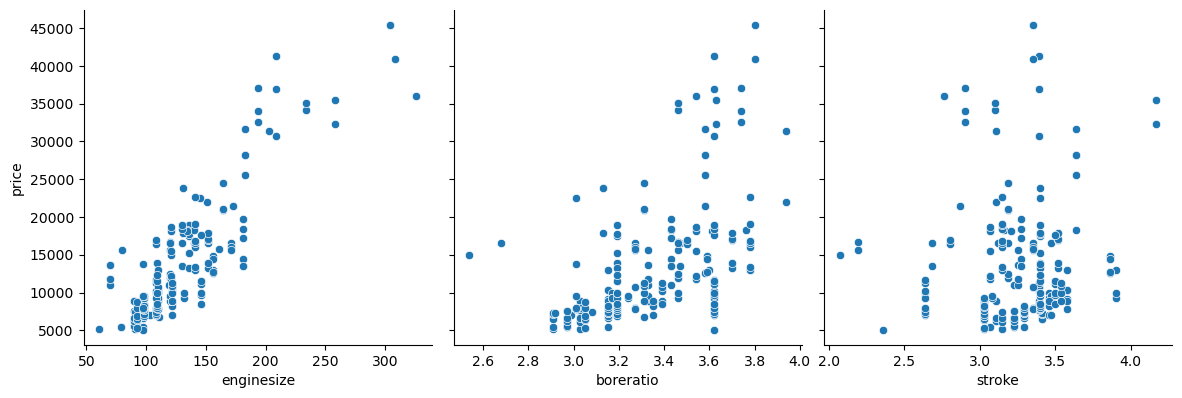

C:\Users\subeh\anaconda3\envs\tf-new\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


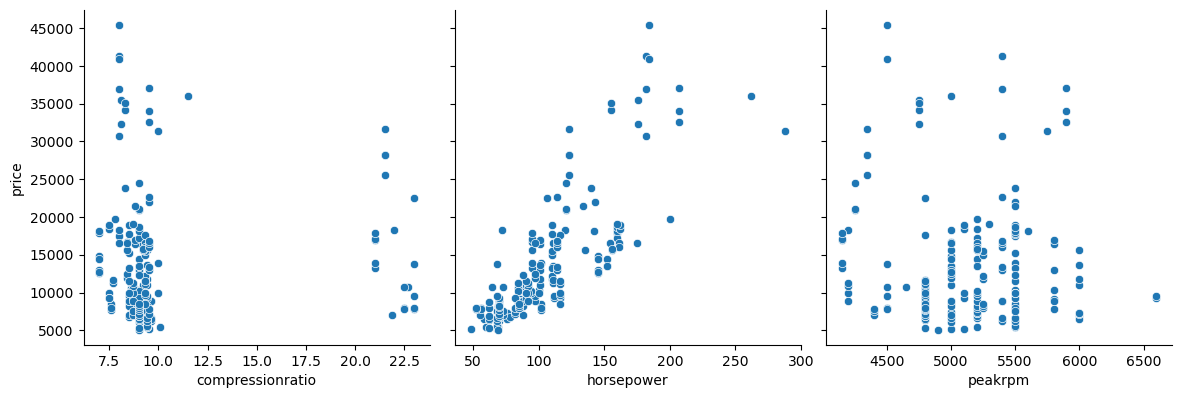

C:\Users\subeh\anaconda3\envs\tf-new\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


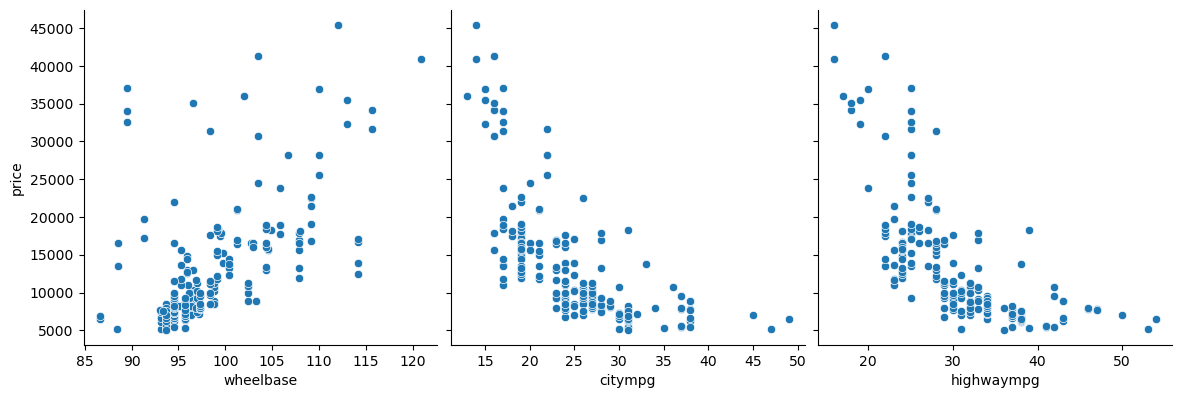

In [16]:
def pp(x,y,z):
    sns.pairplot(cars, x_vars=[x,y,z], y_vars='price',size=4, aspect=1, kind='scatter')
    plt.show()

pp('enginesize', 'boreratio', 'stroke')
pp('compressionratio', 'horsepower', 'peakrpm')
pp('wheelbase', 'citympg', 'highwaympg')

enginesize, boreratio, horsepower, wheelbase - seem to have a significant positive correlation with price.
citympg, highwaympg - seem to have a significant negative correlation with price

#### List of significant variables after Visual analysis :
- Car Range 
- Engine Type 
- Fuel type 
- Car Body 
- Aspiration 
- Cylinder Number 
- Drivewheel 
- Curbweight 
- Car Length
- Car width
- Engine Size 
- Boreratio 
- Horse Power 
- Wheel base 
- Fuel Economy

In [17]:
cars_lr = cars[['price', 'fueltype', 'aspiration','carbody', 'drivewheel','wheelbase',
                  'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'boreratio','horsepower', 
                     'carlength','carwidth']]
cars_lr.head()

,price,fueltype,aspiration,carbody,drivewheel,wheelbase,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,carlength,carwidth
0,13495.0,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,168.8,64.1
1,16500.0,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,168.8,64.1
2,16500.0,gas,std,hatchback,rwd,94.5,2823,ohcv,six,152,2.68,154,171.2,65.5
3,13950.0,gas,std,sedan,fwd,99.8,2337,ohc,four,109,3.19,102,176.6,66.2
4,17450.0,gas,std,sedan,4wd,99.4,2824,ohc,five,136,3.19,115,176.6,66.4


In [18]:
cars_lr.shape


(205, 14)

In [19]:
# Defining the map function
def dummies(x,df):
    temp = pd.get_dummies(df[x], drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df
# Applying the function to the cars_lr

cars_lr = dummies('fueltype',cars_lr)
cars_lr = dummies('aspiration',cars_lr)
cars_lr = dummies('carbody',cars_lr)
cars_lr = dummies('drivewheel',cars_lr)
cars_lr = dummies('enginetype',cars_lr)
cars_lr = dummies('cylindernumber',cars_lr)


In [20]:
cars_lr.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,carlength,carwidth,gas,turbo,...,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two
0,13495.0,88.6,2548,130,3.47,111,168.8,64.1,True,False,...,False,False,False,False,False,True,False,False,False,False
1,16500.0,88.6,2548,130,3.47,111,168.8,64.1,True,False,...,False,False,False,False,False,True,False,False,False,False
2,16500.0,94.5,2823,152,2.68,154,171.2,65.5,True,False,...,False,False,True,False,False,False,True,False,False,False
3,13950.0,99.8,2337,109,3.19,102,176.6,66.2,True,False,...,True,False,False,False,False,True,False,False,False,False
4,17450.0,99.4,2824,136,3.19,115,176.6,66.4,True,False,...,True,False,False,False,True,False,False,False,False,False


# Train-Test Split and feature scaling

In [21]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(cars_lr, train_size = 0.7, test_size = 0.3, random_state = 100)

In [22]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num_vars = ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower','carlength','carwidth','price']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [23]:
df_train.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,carlength,carwidth,gas,turbo,...,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two
122,0.068818,0.244828,0.272692,0.139623,0.230159,0.083333,0.426016,0.291667,True,False,...,True,False,False,False,False,True,False,False,False,False
125,0.466890,0.272414,0.500388,0.339623,1.000000,0.395833,0.452033,0.666667,True,False,...,True,False,False,False,False,True,False,False,False,False
166,0.122110,0.272414,0.314973,0.139623,0.444444,0.266667,0.448780,0.308333,True,False,...,False,False,False,False,False,True,False,False,False,False
1,0.314446,0.068966,0.411171,0.260377,0.626984,0.262500,0.450407,0.316667,True,False,...,False,False,False,False,False,True,False,False,False,False
199,0.382131,0.610345,0.647401,0.260377,0.746032,0.475000,0.775610,0.575000,True,True,...,True,False,False,False,False,True,False,False,False,False


In [24]:
#Dividing data into X and y variables
y_train = df_train.pop('price') # 'price' column is removed from df_train and stored in y_train
X_train = df_train

In [25]:
X_test = df_test.drop('price', axis=1) #when testing target should be dropped
y_test = df_test['price'] #the target (we will use it to calculate performance at the end)

# Model Building

In [26]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [27]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator=lm, n_features_to_select=10)
rfe = rfe.fit(X_train, y_train)


In [28]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))


[('wheelbase', False, 4),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', False, 14),
 ('horsepower', True, 1),
 ('carlength', False, 2),
 ('carwidth', True, 1),
 ('gas', False, 13),
 ('turbo', False, 16),
 ('hardtop', False, 9),
 ('hatchback', False, 3),
 ('sedan', False, 6),
 ('wagon', False, 5),
 ('fwd', False, 18),
 ('rwd', False, 11),
 ('dohcv', True, 1),
 ('l', False, 15),
 ('ohc', False, 7),
 ('ohcf', False, 8),
 ('ohcv', True, 1),
 ('rotor', False, 12),
 ('five', True, 1),
 ('four', True, 1),
 ('six', True, 1),
 ('three', False, 17),
 ('twelve', True, 1),
 ('two', False, 10)]

In [29]:
X_train.columns[rfe.support_]


Index(['curbweight', 'enginesize', 'horsepower', 'carwidth', 'dohcv', 'ohcv',
       'five', 'four', 'six', 'twelve'],
      dtype='object')

In [30]:
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

,curbweight,enginesize,horsepower,carwidth,dohcv,ohcv,five,four,six,twelve
122,0.272692,0.139623,0.083333,0.291667,False,False,False,True,False,False
125,0.500388,0.339623,0.395833,0.666667,False,False,False,True,False,False
166,0.314973,0.139623,0.266667,0.308333,False,False,False,True,False,False
1,0.411171,0.260377,0.262500,0.316667,False,False,False,True,False,False
199,0.647401,0.260377,0.475000,0.575000,False,False,False,True,False,False


In [31]:
import statsmodels.api as sm

def build_model(X, y):
    # Convert boolean columns to integer (0 and 1)
    X = X.astype(int)
    
    # Add a constant column to X
    X = sm.add_constant(X)
    
    # Fit the OLS model
    lm = sm.OLS(y, X).fit()
    
    # Print model summary
    print(lm.summary())
    
    return X


In [32]:
# Assuming X_train_rfe and y_train are already defined
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_new = build_model(X_train_rfe, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.563
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     24.85
Date:                Fri, 21 Jul 2023   Prob (F-statistic):           1.57e-21
Time:                        18:01:03   Log-Likelihood:                 76.150
No. Observations:                 143   AIC:                            -136.3
Df Residuals:                     135   BIC:                            -112.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3477      0.058      5.979      0.0

In [33]:
X_train_new = X_train_rfe.drop(["twelve"], axis = 1)


In [34]:
X_train_new = build_model(X_train_new,y_train)


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.563
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     24.85
Date:                Fri, 21 Jul 2023   Prob (F-statistic):           1.57e-21
Time:                        18:01:05   Log-Likelihood:                 76.150
No. Observations:                 143   AIC:                            -136.3
Df Residuals:                     135   BIC:                            -112.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3477      0.058      5.979      0.0

In [35]:
X_train_new = X_train_new.drop(["curbweight"], axis = 1)
X_train_new = build_model(X_train_new,y_train)


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.531
Model:                            OLS   Adj. R-squared:                  0.511
Method:                 Least Squares   F-statistic:                     25.71
Date:                Fri, 21 Jul 2023   Prob (F-statistic):           2.86e-20
Time:                        18:01:06   Log-Likelihood:                 71.154
No. Observations:                 143   AIC:                            -128.3
Df Residuals:                     136   BIC:                            -107.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3591      0.060      5.996      0.0

In [36]:
#Dropping dohcv to see the changes in model statistics
X_train_new = X_train_new.drop(["dohcv"], axis = 1)
X_train_new = build_model(X_train_new,y_train)



                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.531
Model:                            OLS   Adj. R-squared:                  0.511
Method:                 Least Squares   F-statistic:                     25.71
Date:                Fri, 21 Jul 2023   Prob (F-statistic):           2.86e-20
Time:                        18:01:06   Log-Likelihood:                 71.154
No. Observations:                 143   AIC:                            -128.3
Df Residuals:                     136   BIC:                            -107.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3591      0.060      5.996      0.0

In [37]:
#Scaling the test set
num_vars = ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower','carlength','carwidth','price','ohcv', 'five', 'four', 'six']
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [38]:
#Dividing into X and y
y_test = df_test.pop('price')
X_test = df_test

In [39]:
# Assuming X_train_new, X_test_new, and y_train are already defined

# Adding a constant variable to X_test_new
X_test_new = sm.add_constant(X_test)

print("Features used during model training:", X_train_new.columns.tolist())

# Keep only the common features between X_train_new and X_test_new
feature_names_train = X_train_new.columns.tolist()

# Get the common features between X_train and X_test_new
common_features = list(set(feature_names_train).intersection(X_test_new.columns))
feature_names = X_train.columns.tolist()
# Reorder the columns in X_test_new to match the feature order used in X_train
X_test_new = X_test_new[feature_names]
y_pred = lm.predict(X_test_new)


Features used during model training: ['const', 'enginesize', 'horsepower', 'carwidth', 'ohcv', 'five', 'four', 'six']


In [40]:
from sklearn.metrics import mean_squared_error, r2_score

In [41]:
y_pred = lm.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error:", mse)


Mean Squared Error: 0.016435170972447528


Text(0, 0.5, 'y_pred')

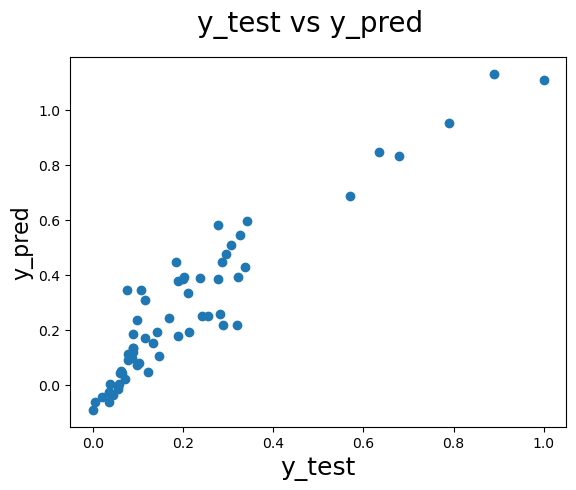

In [42]:
#EVALUATION OF THE MODEL
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)  